In [1]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt  

import scipy.optimize as op
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def addOnes(X):
    """helper function for vectorized computation
    Parameters
    ==========
    X : m x n matrix,  m = size of data, n = number of features
    
    Returns
    =======
    m x (n + 1) matrix where first column is filled with 1.
    """
    m = X.shape[0]
    ones = np.ones(m)
    onesX = np.column_stack((ones, X))
    return onesX

def sigmoid(x):
    """sigmoid function
       [-infinity, infinity] ->  [0, 1]
    """
    return 1.0 / (1 + np.exp(-x))

def computeCostLogistic(theta, X, y, lambda_ = 0):
    """ compute cost(loss) for logistic regression
    Parameters
    ==========
    X : m x n matrix,  m = size of data, n = number of features
    theta : (n + 1) x 1 matrix, theta[0] is for bias
    y : m x 1 matrix

    Returns
    =======
    cost value for given theta, X and y
    """
    m = X.shape[0]
    theta = theta.reshape(-1,1)
    t0 = np.copy(theta); t0[0] = 0;   #  t0 equals to theta but with the first element, 0
    y = y.reshape(-1,1)
    h = sigmoid(X @ theta)
    J =  - y.T @ log(h) - (1- y).T @ log(1-h) + (lambda_/2) * t0.T @ t0
    J = (1.0/m) * J
    return J[0,0]

def computeGradLogistic(theta, X, y, lambda_ = 0):
    """ compute gradient """
    m = X.shape[0]
    theta = theta.reshape(-1,1)
    t0 = np.copy(theta); t0[0] = 0;
    y = y.reshape(-1,1)
    h = sigmoid(X @ theta)
    grad = (1.0/m) * (X.T @ (h - y)) + lambda_ * t0
    grad = grad.ravel()
    return grad

def gradientDescentLogistic(X, y, lambda_=0, alpha=0.01, numIter=1500):
    """ minimize theta by using gradient descent method
    Theta is initialized with zeros.

    Parameters
    ==========
    X: input data with n features
    y: labled real data
    alpha : learning rate for gradient descent algorithm
    numIter : number of iterations for gradient descent

    Returns
    ========
    theta : (n+1, ) ndarray, minimized value for weights(coefficients for features and bias term)
             where n is number of features of input data, x
    cost =
    J_history : (numIter, ) ndarray, cost values for every iteration
    """
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n, 1))
    y = y.reshape(-1,1)
    J_history = np.zeros(numIter)
    for i in range(0, numIter):
        h = sigmoid(X @ theta)
        t0 = np.copy(theta); to[0] = 0;
        cost =  (1.0/m) * (- y.T @ log(h) - (1- y).T @ log(1-h)) + (lambda_/2) * t0.T @ t0
        J_history[i] = cost[0]
        gradient =  (1.0/m) * (X.T @ (h - y)) + lambda_ * t0
        theta = theta - alpha * gradient
    theta = theta.ravel()
    return (theta, J_history)

def predict(theta, X):
    """predict lables from input data X and weight values
       m : size of input data

    Returns
    =======
    predict : (m, 1) ndarray
    """
    h = sigmoid(X @ theta)
    threshold = 0.5
    predict = (h > threshold).astype(int)
    return predict

def accuracy(theta, X, y):
    """compute accuracy for trained weight values
       I recommend to use sklearn.metrics.accuracyscore() function.
       I wrote this function when I didn't know the function above.

    Returns
    =======
    accuracy : float
    """
    p = predict(theta, X)
    compare = (p.reshape(1,-1) == y.reshape(1,-1)).astype(int)
    accuracy = np.mean(compare)
    return accuracy


def plot2D(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='y')
    plt.show()
    
def plot2DLog(theta, X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='y')
    x_lin = np.linspace(np.min(X[:,0]) , np.max(X[:,0]), 100)
    plt.plot(x_lin, - (x_lin * theta[1] + theta[0])/theta[2])
    plt.show()
    
def plotPolyMesh2DLog(X, y, p, C=1e5):
    """
    Plot binary labled data in 2D area

    Parameters
    ==========
    X : (m, 2) ndarray
    y : (m, ) ndarray
    p : polynomial dimension
    C : consider this as an inverse of lambda_ , regularization term for penalty
    """
    from sklearn import linear_model, metrics
    from sklearn.preprocessing import PolynomialFeatures

    poly = PolynomialFeatures(p)
    X_poly = poly.fit_transform(X)

    logreg = linear_model.LogisticRegression(C=C)
    logreg.fit(X_poly,y.ravel())
    
    prediction = logreg.predict(X_poly)
    accuracy = metrics.accuracy_score(prediction, y)
    print('Accuracy : ', accuracy)
    
    pts = 200
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, pts), np.linspace(y_min, y_max, pts))
    Z = logreg.predict( poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])[:,:]  )

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 6))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set2)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

## 1.로지스틱 회귀 - 선형으로 분리 가능한 데이터

로지스틱회귀는 예측하는 Y 레이블이 0과 1 뿐인 Binary classification 입니다.

선형회귀에서의 가설(hypothesis, $h(\theta) = \theta^T X$)은 범위는 실수 전체 입니다. 이 가설을 그대로 로지스틱회귀에는 사용할 수가 없어서, sigmoid 함수를 사용해서 0 과 1 사이의 값으로 스케일링 해줍니다.

아래의 sigmoid 함수 그래프를 보면 x 가 커지면 1로 수렴하고 x 가 작아지면 0으로 수렴하는 것을 알 수 있습니다.

x = 0, y = 0.5 를 기준으로 그래프가 점대칭입니다.

로지스틱회귀의 가설함수 $h(\theta) =  \frac{1}{1 + e^{-z}}$ , $z=\theta^T X$ 의 결과가 0.5 보다 크면 1로 예측하고 0.5 보다 작거나 같으면 0으로 예측하는 전략을 사용합니다.   가설값 자체는 그 자료가 1이 될 확률로 해석합니다.

즉, $\theta^T X = 0$ 인 선 또는 다차원 면이 분류의 경계가 됩니다. hyperplain 이라고 하는데, 이 경계면를 결정하는 적당한 $\theta$ (가중치) 를 찾는 것이 로지스틱회귀의 목적입니다.

### Sigmoid 함수 그래프

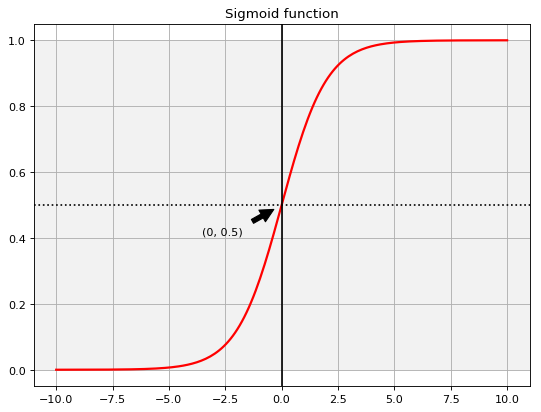

In [3]:
x = np.linspace(-10,10,200)
y = sigmoid(x)
plt.figure(figsize=(8,6), dpi=80)
plt.subplot('111')
plt.plot(x,y, 'r-', lw=2)
plt.axvline(x=0, color='k')
plt.axhline(y=.5, ls='dotted', color='k')
plt.axhspan(0,1, facecolor='0.9', alpha=0.5, ls='dotted')
plt.grid(True)
plt.annotate('(0, 0.5)',
             xy=(0,0.5),
             xytext=(-80,-30),
             textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.2))
plt.title('Sigmoid function')
plt.show()

### 로지스틱회귀의 비용함수

 로지스틱회귀의 비용함수는 식은 다음과 같습니다.
 
 $J(\theta) = \frac{1}{m} \sum -y \log(h(\theta)) -(1-y) \log(1 -1 h(\theta))$ 
 
예측이 틀렸을 때 매우 큰 패널티(비용)을 부과하도록 되어 있습니다.

이 복잡해 보이는 식은 주어진 자료와 예측값에 대한 우도(likehood) 에 로그를 씌우고 마이너스 1을 곱한 식입니다.
이 식을 최소화 한단는 말은 우도의 값을 최대화 하는 것과 같습니다.

실습을 하거나 어떤 머신러닝 시스템을 다룰 때도 이런 상세한 내용은 몰라도 전혀 지장이 없습니다.

로지스틱회귀의 비용함수에 대한 미분 함수는 선형회귀의 것과 동일한 모양입니다.

수학적인 의미가 있어서 같은 형태의 식이 나왔는지는 모르겠지만 실제로 로지스틱회귀의 비용함수를 고등학교에서 배웠던 미분 공식을 사용해서 미분해보면 확인할 수 있습니다.

### 데이터 로딩, 살펴보기

In [4]:
data = np.loadtxt('../data/ex2data1.txt', delimiter=',') 
X = data[:,:data.shape[1] - 1]; print(X.shape)  #X = data[:, 0:2]
y = data[:,data.shape[1] - 1:]; print(y.shape)  #y = data[:, 2]


(100, 2)
(100, 1)


In [5]:
print(X[:5,:])
print(y[:5,:])

[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


데이터를 살펴보니 X 는 (x1, x2) 형태의 피쳐가 두 개입니다.  x1 과 x2 의 스케일이 어느정도 비슷하고 숫자의 크기도 크지 않으니 우선 데이터를 정규화하지 않고 그냥 회귀를 해보겠습니다.

데이터를 눈으로 확인했으니 시각화도 해보겠습니다.

참고로 x1 은 중간고사의 점수 x2 는 기말고사의 점수로 레이블 1은 합격, 레이블 0은 불합격을 가르킵니다.

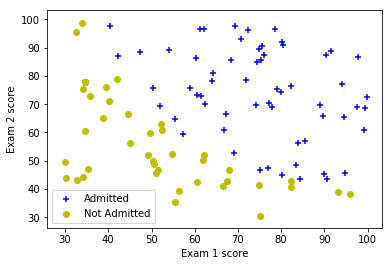

In [6]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='y')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

Optimization terminated successfully.
         Current function value: 0.203527
         Iterations: 28
         Function evaluations: 81
         Gradient evaluations: 242
         Hessian evaluations: 0
[-24.72209251   0.20271971   0.19791608]


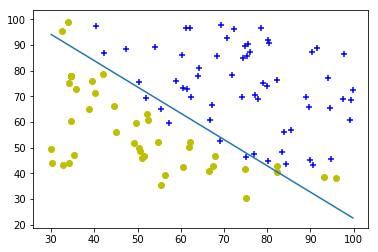

In [7]:
initial_theta = np.zeros(X.shape[1] + 1)
theta2 = op.fmin_ncg(computeCostLogistic, initial_theta, args = (addOnes(X), y,),fprime=computeGradLogistic); print(theta2)
plot2DLog(theta2, X, y)

Accuracy :  0.99


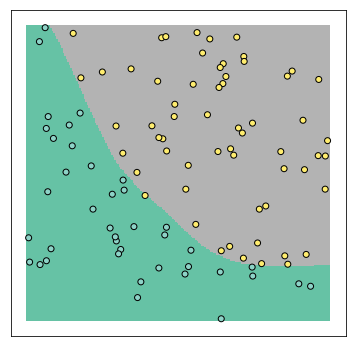

In [8]:
plotPolyMesh2DLog(X,y,8,1e6)

(118, 2)
(118, 1)


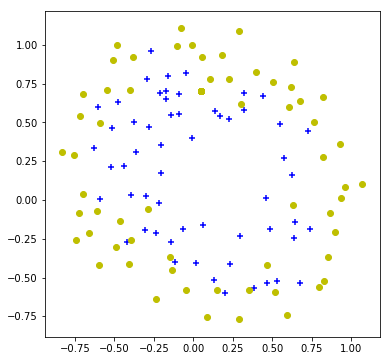

In [9]:

data = np.loadtxt('../data/ex2data2.txt', delimiter=',') 
X = data[:,:data.shape[1] - 1]; print(X.shape)  #X = data[:, 0:2]
y = data[:,data.shape[1] - 1:]; print(y.shape)  #y = data[:, 2]
plt.figure(figsize=(6,6))
plot2D(X, y)

Accuracy :  0.550847457627


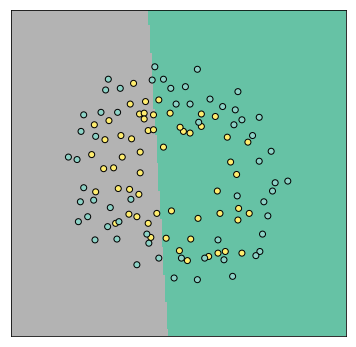

In [15]:
plotPolyMesh2DLog(X,y,1,1e5)

Accuracy :  0.872881355932


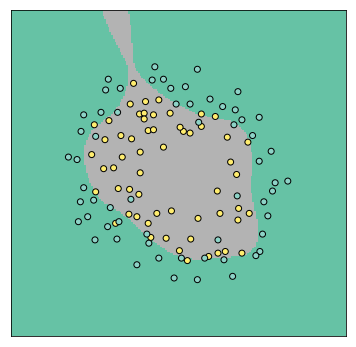

In [14]:
plotPolyMesh2DLog(X,y,6,1e5)
